IMPORT LIB

In [390]:
import pandas as  pd    
import seaborn as sns
import numpy as np
import plotly.express as px 
import openpyxl
import matplotlib.pyplot as plt

IMPORT DATA, CLEANING AND EXPLO
---
>

In [391]:
df_survey=pd.read_csv('/Users/kalou/Documents/GitHub/rh-analysis/archive/employee_survey_data.csv')
df_general=pd.read_csv('/Users/kalou/Documents/GitHub/rh-analysis/archive/general_data.csv')
df_in_time=pd.read_csv('/Users/kalou/Documents/GitHub/rh-analysis/archive/in_time.csv')
df_manager_survey=pd.read_csv('/Users/kalou/Documents/GitHub/rh-analysis/archive/manager_survey_data.csv')
df_out_time=pd.read_csv('/Users/kalou/Documents/GitHub/rh-analysis/archive/out_time.csv')
dictionary = pd.read_excel('/Users/kalou/Documents/GitHub/rh-analysis/archive/data_dictionary.xlsx')


EXPLO DATA

In [392]:
df_manager_survey

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3
...,...,...,...
4405,4406,3,3
4406,4407,2,3
4407,4408,3,4
4408,4409,2,3


In [393]:
df_manager_survey.isnull().sum()

EmployeeID           0
JobInvolvement       0
PerformanceRating    0
dtype: int64

DF SURVEY

In [394]:
df_survey.isnull().sum()

EmployeeID                  0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
dtype: int64

In [395]:
df_survey.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [396]:
df_survey_clean=df_survey.dropna()

DF GENERAL

In [397]:
df_general

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,0.0,Y,14,8,1,10.0,2,9,7,8


In [398]:
df_general_survey = pd.merge(df_general, df_survey, on='EmployeeID', how='outer')


In [399]:
df_general_final = pd.merge(df_general_survey, df_manager_survey, on='EmployeeID', how='outer')


In [400]:
df_general_final.shape

(4410, 29)

In [401]:
df_general_final.dropna(subset=['EnvironmentSatisfaction','JobSatisfaction' ,'WorkLifeBalance'])

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,29,No,Travel_Rarely,Sales,4,3,Other,1,4405,Female,...,6.0,2,6,1,5,3.0,4.0,3.0,2,3
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,10.0,5,3,0,2,4.0,1.0,3.0,3,3
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,10.0,2,3,0,2,4.0,4.0,3.0,2,3
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,5.0,4,4,1,2,1.0,3.0,3.0,3,4


In [402]:
df_general_survey_clean=df_general_final.dropna(subset=['EnvironmentSatisfaction','JobSatisfaction' ,'WorkLifeBalance'])

In [403]:
df_general_explo = df_general_survey_clean.drop(columns=['Gender', 'Over18', 'EmployeeCount', 'StandardHours'])

In [471]:
df_all=pd.read_csv('/Users/kalou/Documents/GitHub/rh-analysis/archive/df_all.csv')

In [404]:
def Apercentage(df,column_names):
    results = {}
    for column_name in column_names:
        values = df[column_name].unique()
        for column_value in values:
            yes_counts = df[df[column_name] == column_value]['Attrition'].value_counts().get('Yes', 0)
            total_counts = df[df[column_name] == column_value]['Attrition'].count()
            percentage_of_attrition = yes_counts / total_counts * 100

            results[column_value] = percentage_of_attrition
    
    return results


In [405]:

def Tpercentagev2(df, filter_column, filter_value, target_column):
    filtered_df = df[df[filter_column] == filter_value]
    value_counts = filtered_df[target_column].value_counts()
    total_count = filtered_df[target_column].count()
    percentages = (value_counts / total_count) * 100
    return percentages



In [406]:
def Tpercentage(df, filter_column, target_column):
    results = {}
    unique_values = df[filter_column].drop_duplicates()
    for value in unique_values:
        filtered_df = df[df[filter_column] == value]
        value_counts = filtered_df[target_column].value_counts()
        total_count = filtered_df[target_column].count()
        percentages = (value_counts / total_count) * 100
        results[value] = percentages
    return results





In [407]:
Tpercentagev2(df_all, 'JobRole','Research Scientist', 'JobSatisfaction')


JobSatisfaction
4.0    29.324170
3.0    28.865979
2.0    21.649485
1.0    20.160367
Name: count, dtype: float64

JOB ROLE EXPLO
---
>

In [472]:
JobRole = ['JobRole']
job=Apercentage(df_all,JobRole)
job

{'Healthcare Representative': 14.50381679389313,
 'Research Scientist': 18.15068493150685,
 'Sales Executive': 16.87116564417178,
 'Human Resources': 13.461538461538462,
 'Research Director': 23.75,
 'Laboratory Technician': 16.216216216216218,
 'Manufacturing Director': 11.03448275862069,
 'Sales Representative': 14.457831325301203,
 'Manager': 13.725490196078432}

In [410]:
df_all.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeID', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'TotalWorkingHours', 'AverageHoursPerDay',
       'NumberOfDaysAbsent', 'JobInvolvement', 'PerformanceRating',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance'],
      dtype='object')

In [411]:
Tpercentagev2(df_all, 'JobRole','Research Scientist', 'JobInvolvement')


JobInvolvement
3    55.821918
2    27.739726
4     8.561644
1     7.876712
Name: count, dtype: float64

Text(0.5, 1.0, 'Attrition Rate by Job Role')

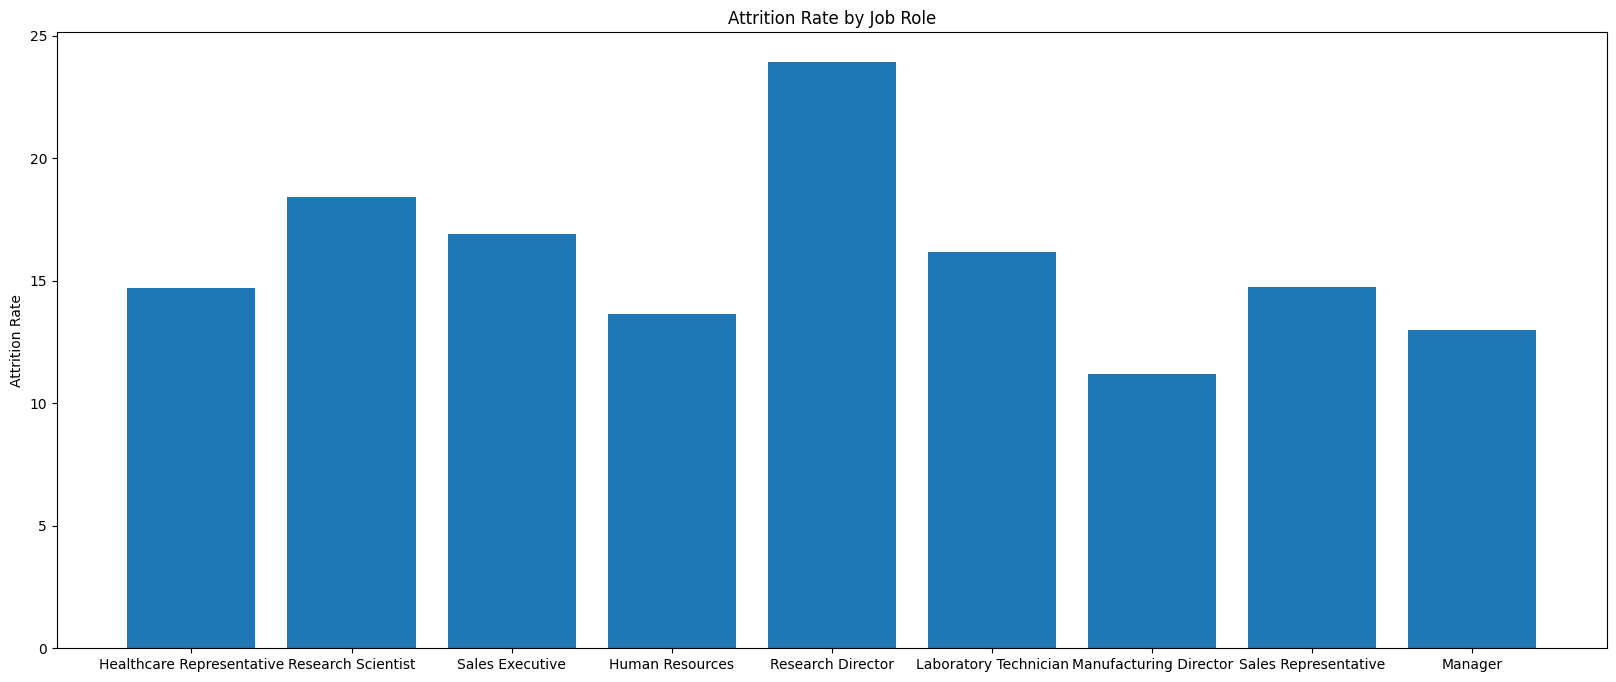

In [412]:
plt.figure(figsize=(20,8))
plt.bar(list(job.keys()), list(job.values()))
plt.ylabel('Attrition Rate')
plt.title('Attrition Rate by Job Role')


In [413]:
df_all.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeID', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'TotalWorkingHours', 'AverageHoursPerDay',
       'NumberOfDaysAbsent', 'JobInvolvement', 'PerformanceRating',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance'],
      dtype='object')

In [414]:
df_all[df_all['JobRole'] == 'Research Scientist']['MonthlyIncome'].value_counts()


MonthlyIncome
47790     6
34200     6
173280    6
24220     3
75250     3
         ..
120610    3
56740     3
58280     3
23730     3
60290     3
Name: count, Length: 289, dtype: int64

In [415]:
df_all[df_all['JobRole'] == 'Research Director']['EnvironmentSatisfaction'].value_counts()


EnvironmentSatisfaction
4.0    78
3.0    69
2.0    51
1.0    42
Name: count, dtype: int64

DEPARTMENT EXPLO
---
>

In [473]:
Department = ['Department']
dep=Apercentage(df_all,Department)
dep

{'Sales': 15.022421524663676,
 'Research & Development': 15.71279916753382,
 'Human Resources': 30.158730158730158}

Text(0.5, 1.0, 'Attrition Rate by Department')

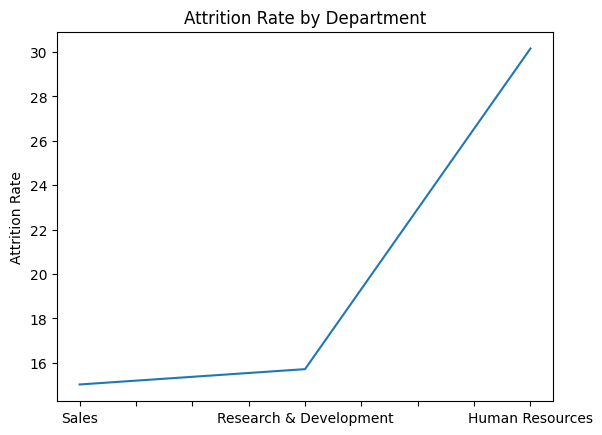

In [474]:
pd.Series(dep).plot()  
plt.ylabel('Attrition Rate')
plt.title('Attrition Rate by Department')



In [475]:
Tpercentagev2(df_all, 'Department','Human Resources', 'JobSatisfaction')


JobSatisfaction
4.0    33.333333
3.0    23.809524
1.0    22.222222
2.0    20.634921
Name: count, dtype: float64

MARITAL STATUS EXPLO
---
>

In [476]:
MaritalStatus = ['MaritalStatus']
status=Apercentage(df_all,MaritalStatus)

Text(0.5, 1.0, 'Attrition Rate by Marital Status')

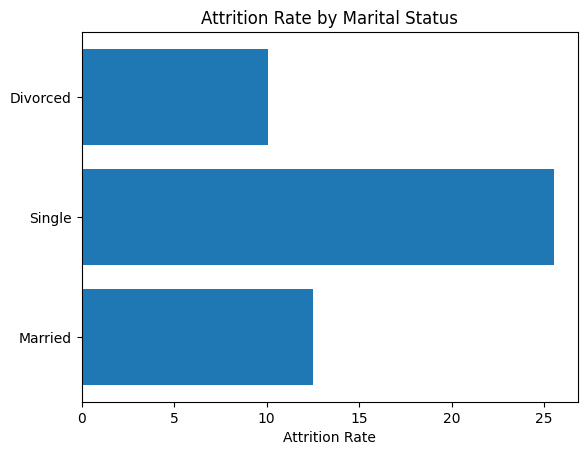

In [477]:
plt.barh(list(status.keys()), list(status.values()))
plt.xlabel('Attrition Rate')
plt.title('Attrition Rate by Marital Status')



BUSINESS TRAVEL EXPLO
---
>

In [469]:
BusinessTravel = ['BusinessTravel']
travel_attrition=Apercentage(df_all,BusinessTravel)
travel_attrition

{'Travel_Rarely': 14.956855225311601,
 'Travel_Frequently': 24.90974729241877,
 'Non-Travel': 8.0}

Text(0.5, 1.0, 'Attrition Rate by Travel Frequency')

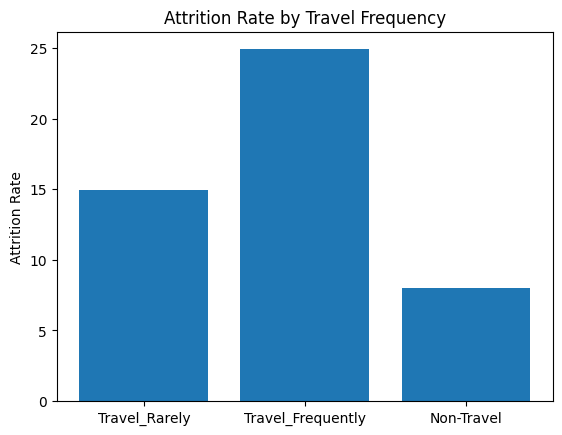

In [470]:
plt.bar(list(travel_attrition.keys()), list(travel_attrition.values()))
plt.ylabel('Attrition Rate')
plt.title('Attrition Rate by Travel Frequency')


ENVIRONMENT SATISFACTION EXPLO

In [481]:
EnvironmentSatisfaction = ['EnvironmentSatisfaction']
Apercentage(df_general_explo,EnvironmentSatisfaction)


{3.0: 13.834586466165414,
 2.0: 15.147928994082841,
 4.0: 13.419257012888552,
 1.0: 25.45018007202881}

In [484]:
JobSatisfaction = ['JobSatisfaction']
Apercentage(df_general_explo,JobSatisfaction)



{4.0: 11.400894187779434,
 2.0: 16.50602409638554,
 1.0: 22.91421856639248,
 3.0: 16.56441717791411}

WORK LIFE BALANCE

In [485]:
WorkLifeBalance = ['WorkLifeBalance']
Apercentage(df_general_explo,WorkLifeBalance)

{2.0: 16.55104063429138,
 4.0: 17.96008869179601,
 1.0: 31.223628691983123,
 3.0: 14.4106463878327}

In [427]:
yes_counts_sales = df_general_explo[df_general_explo['JobRole'] == 'Sales Executive']['Attrition'].value_counts().get('Yes', 0)
counts_sales = df_general_explo[df_general_explo['JobRole'] == 'Sales Executive']['Attrition'].count()
Percentage_of_Attrition_sales=yes_counts_sales/counts_sales *100
Percentage_of_Attrition_sales

16.89259645464025

In [428]:
df_general_explo['Department'].value_counts()

Department
Research & Development    2824
Sales                     1315
Human Resources            188
Name: count, dtype: int64

In [429]:
df_general_explo['JobRole'].value_counts()

JobRole
Sales Executive              959
Research Scientist           863
Laboratory Technician        760
Manufacturing Director       428
Healthcare Representative    381
Manager                      300
Sales Representative         244
Research Director            238
Human Resources              154
Name: count, dtype: int64

In [430]:
df_general_explo['MaritalStatus'].value_counts()

MaritalStatus
Married     1981
Single      1387
Divorced     959
Name: count, dtype: int64

KPI
---
>


In [431]:


nombre_departs = df_general_explo['Attrition'].value_counts()['Yes']
nombre_employes_total = len(df_general_explo)
taux_rotation_personnel = (nombre_departs / nombre_employes_total) * 100

taux_rotation_personnel


16.200600878206608

In [432]:

df_general_explo['DurationInPosition'] = df_general_explo['YearsAtCompany'] - df_general_explo['YearsSinceLastPromotion']


df_general_explo[['Attrition','YearsAtCompany', 'YearsSinceLastPromotion', 'DurationInPosition']]

,Attrition,YearsAtCompany,YearsSinceLastPromotion,DurationInPosition
0,No,1,0,1
1,Yes,5,1,4
2,No,5,0,5
3,No,8,7,1
4,No,6,0,6
...,...,...,...,...
4404,No,6,1,5
4405,No,3,0,3
4406,No,3,0,3
4407,No,4,1,3


In [486]:
df_all.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeID                  0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
PercentSalaryHike           0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
TotalWorkingHours           0
AverageHoursPerDay          0
NumberOfDaysAbsent          0
JobInvolvement              0
PerformanceRating           0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
dtype: int64

In [433]:
df_general_explo.groupby('JobRole')['JobSatisfaction'].mean()


JobRole
Healthcare Representative    2.721785
Human Resources              3.006494
Laboratory Technician        2.689474
Manager                      2.720000
Manufacturing Director       2.782710
Research Director            2.852941
Research Scientist           2.674392
Sales Executive              2.720542
Sales Representative         2.639344
Name: JobSatisfaction, dtype: float64

EXPLO OVERTIME
---
>

In [464]:
Overtime = df_all[df_all['AverageHoursPerDay'] > 480]
Overtime

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,JobLevel,JobRole,...,YearsSinceLastPromotion,YearsWithCurrManager,TotalWorkingHours,AverageHoursPerDay,NumberOfDaysAbsent,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
5,46,No,Travel_Rarely,Research & Development,8,3,Life Sciences,6,4,Research Director,...,7,7,153412,614.0,12,3,3,3.0,2.0,2.0
10,45,No,Travel_Rarely,Research & Development,17,2,Medical,11,2,Laboratory Technician,...,4,10,121406,486.0,8,2,3,3.0,4.0,3.0
12,55,No,Travel_Rarely,Research & Development,14,4,Life Sciences,13,1,Sales Executive,...,4,13,127702,511.0,20,3,3,4.0,1.0,3.0
13,47,Yes,Non-Travel,Research & Development,1,1,Medical,14,1,Research Scientist,...,9,9,132434,530.0,14,2,3,1.0,2.0,2.0
17,37,No,Non-Travel,Research & Development,1,3,Medical,18,2,Sales Executive,...,0,2,162469,650.0,3,3,3,1.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4389,52,No,Non-Travel,Research & Development,2,3,Technical Degree,4390,1,Sales Executive,...,15,12,133230,533.0,5,2,3,1.0,3.0,4.0
4391,32,Yes,Travel_Rarely,Sales,23,1,Life Sciences,4392,3,Healthcare Representative,...,1,2,150820,603.0,9,3,3,4.0,3.0,1.0
4401,45,No,Travel_Frequently,Sales,21,1,Marketing,4402,3,Research Scientist,...,0,2,121294,485.0,5,2,3,1.0,3.0,3.0
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,4406,1,Research Scientist,...,0,2,128538,514.0,6,3,3,4.0,1.0,3.0


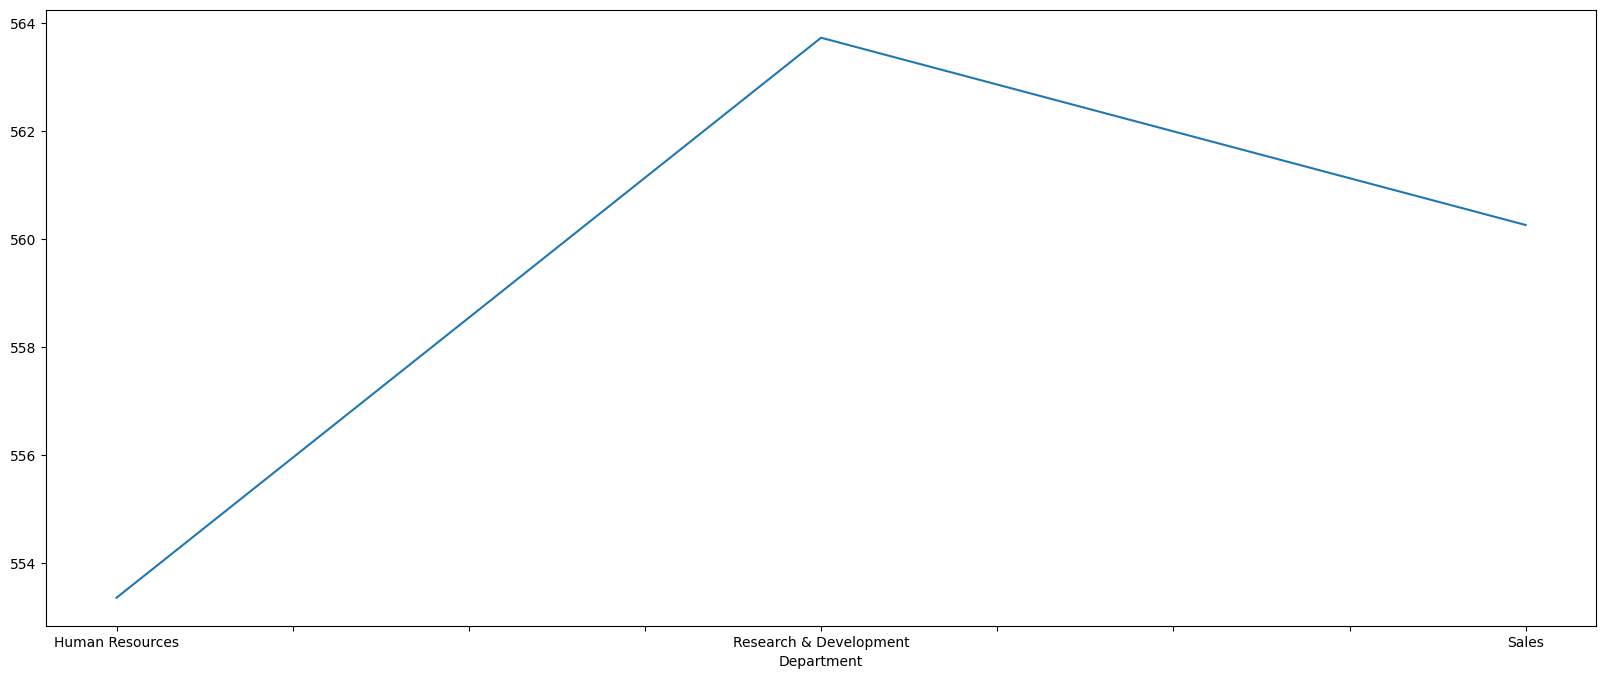

In [438]:
plt.figure(figsize=(20,8))
supp_department = Overtime.groupby('Department')['AverageHoursPerDay'].mean().plot()


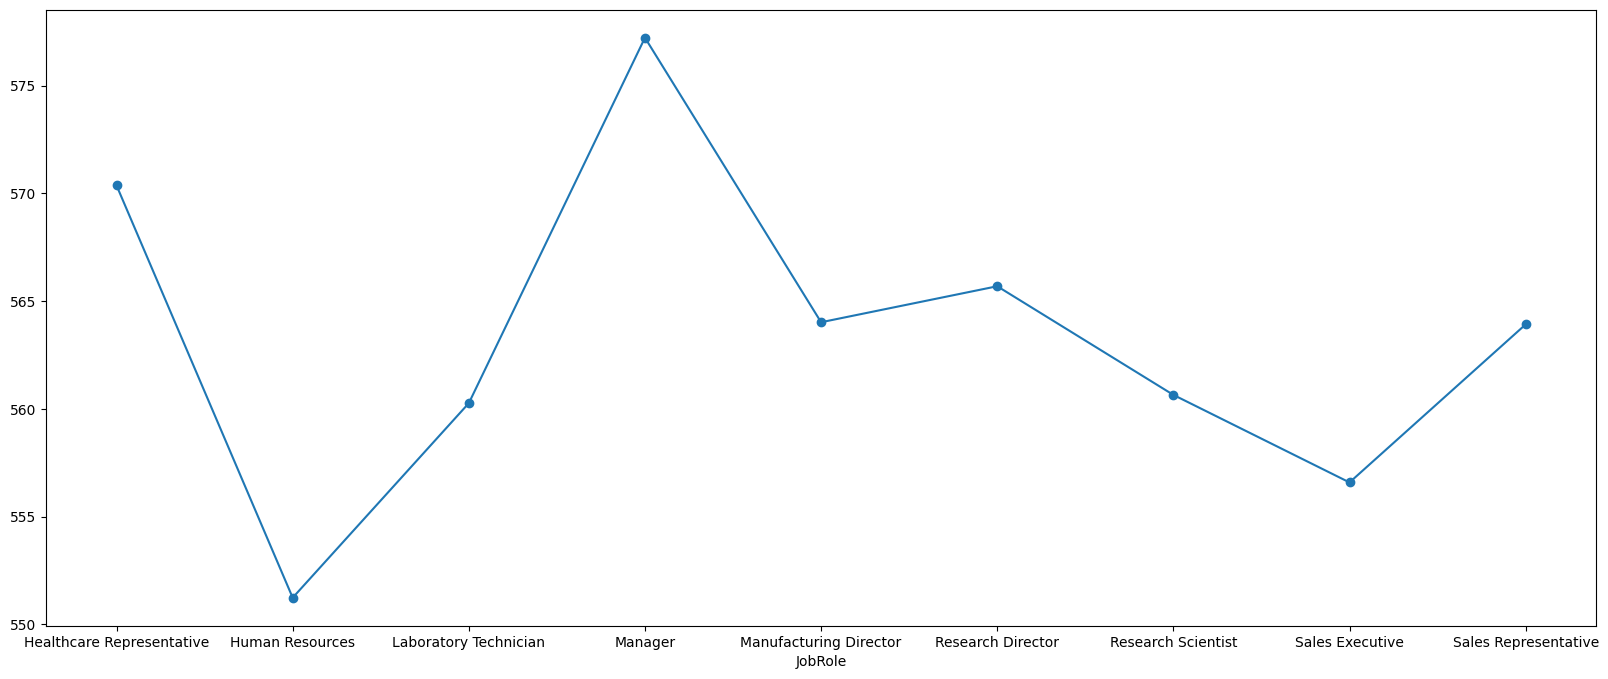

In [439]:
plt.figure(figsize=(20,8))
supp_jobrole = Overtime.groupby('JobRole')['AverageHoursPerDay'].mean().plot(kind='line', marker='o')


In [440]:
print(Overtime.groupby('Department')['AverageHoursPerDay'].mean())

Department
Human Resources           553.360656
Research & Development    563.732794
Sales                     560.264331
Name: AverageHoursPerDay, dtype: float64


In [441]:
df_all[df_all['AverageHoursPerDay'] > 480].count()/ df_all.count() *100


Age                        25.306122
Attrition                  25.306122
BusinessTravel             25.306122
Department                 25.306122
DistanceFromHome           25.306122
Education                  25.306122
EducationField             25.306122
EmployeeID                 25.306122
JobLevel                   25.306122
JobRole                    25.306122
MaritalStatus              25.306122
MonthlyIncome              25.306122
NumCompaniesWorked         25.324527
PercentSalaryHike          25.306122
StockOptionLevel           25.306122
TotalWorkingYears          25.289707
TrainingTimesLastYear      25.306122
YearsAtCompany             25.306122
YearsSinceLastPromotion    25.306122
YearsWithCurrManager       25.306122
TotalWorkingHours          25.306122
AverageHoursPerDay         25.306122
NumberOfDaysAbsent         25.306122
JobInvolvement             25.306122
PerformanceRating          25.306122
EnvironmentSatisfaction    25.313569
JobSatisfaction            25.375854
W

In [442]:
percentage = df_all[df_all['AverageHoursPerDay'] > 480].count() / df_all.count()
print(percentage)

Age                        0.253061
Attrition                  0.253061
BusinessTravel             0.253061
Department                 0.253061
DistanceFromHome           0.253061
Education                  0.253061
EducationField             0.253061
EmployeeID                 0.253061
JobLevel                   0.253061
JobRole                    0.253061
MaritalStatus              0.253061
MonthlyIncome              0.253061
NumCompaniesWorked         0.253245
PercentSalaryHike          0.253061
StockOptionLevel           0.253061
TotalWorkingYears          0.252897
TrainingTimesLastYear      0.253061
YearsAtCompany             0.253061
YearsSinceLastPromotion    0.253061
YearsWithCurrManager       0.253061
TotalWorkingHours          0.253061
AverageHoursPerDay         0.253061
NumberOfDaysAbsent         0.253061
JobInvolvement             0.253061
PerformanceRating          0.253061
EnvironmentSatisfaction    0.253136
JobSatisfaction            0.253759
WorkLifeBalance            0

In [443]:
yes_counts_overtimers=df_all[df_all['AverageHoursPerDay'] > 480]['Attrition'].value_counts().get('Yes', 0)
count_overtimers = df_all[df_all['AverageHoursPerDay'] > 480]['Attrition'].count()
Attrition_rate_overtimers=yes_counts_overtimers/count_overtimers *100
Attrition_rate_overtimers

29.659498207885303

JOB SATISFACTION FOR OVERTIMERS
---
>

<Axes: xlabel='JobRole'>

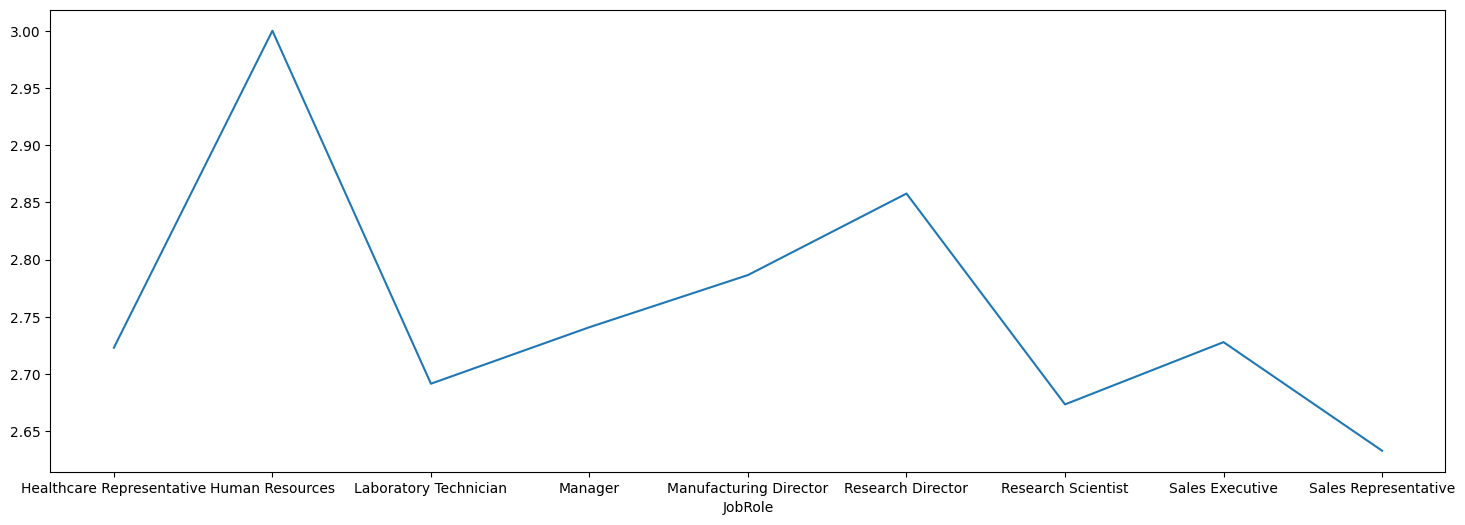

In [463]:
plt.figure(figsize=(18,6))
df_all.groupby('JobRole')['JobSatisfaction'].mean().plot()

<Axes: xlabel='Department'>

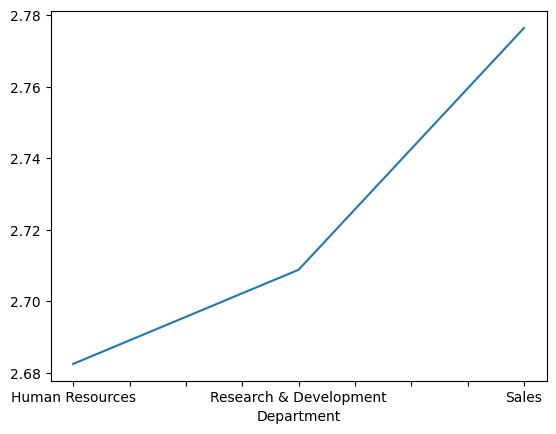

In [466]:
df_all.groupby('Department')['JobSatisfaction'].mean().plot()

WORKLIFE BALANCE

<Axes: xlabel='Department'>

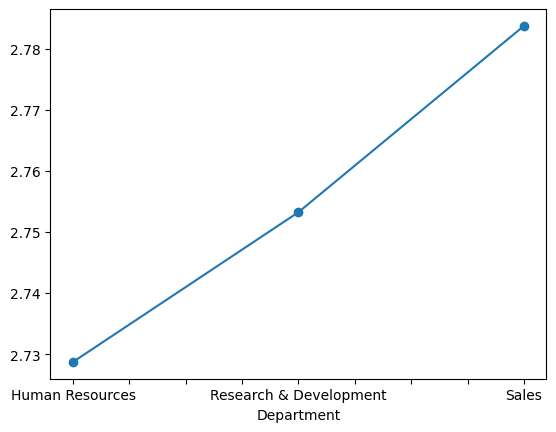

In [467]:
df_all.groupby('Department')['WorkLifeBalance'].mean().plot(marker='o')

<Axes: xlabel='JobRole'>

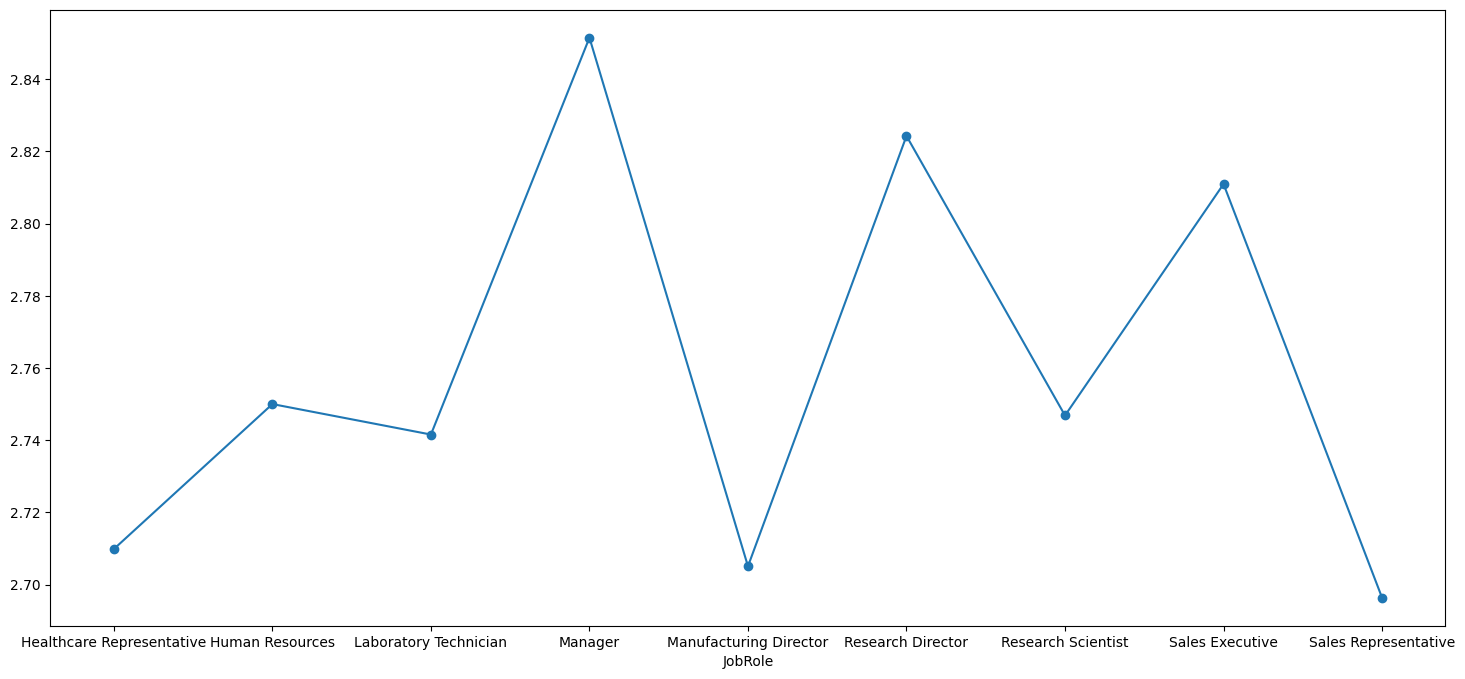

In [468]:
plt.figure(figsize=(18,8))
df_all.groupby('JobRole')['WorkLifeBalance'].mean().plot(marker='o')

EXPLO BUSINESS TRAVEL (DRAFT)
---
>

In [448]:
df_general_explo['BusinessTravel'].value_counts()

BusinessTravel
Travel_Rarely        3070
Travel_Frequently     815
Non-Travel            442
Name: count, dtype: int64

In [449]:
yes_counts_travel_frequently = df_general_explo[df_general_explo['BusinessTravel'] == 'Travel_Frequently']['Attrition'].value_counts().get('Yes', 0)
counts_travel_frequently = df_general_explo[df_general_explo['BusinessTravel'] == 'Travel_Frequently']['Attrition'].count()
Percentage_of_Attrition=yes_counts_travel_frequently/counts_travel_frequently *100
Percentage_of_Attrition

24.785276073619634

In [450]:
yes_counts_travel_frequently2 = df_general_explo[df_general_explo['BusinessTravel'] == 'Non-Travel']['Attrition'].value_counts().get('Yes', 0)
counts_travel_frequently2 = df_general_explo[df_general_explo['BusinessTravel'] == 'Non-Travel']['Attrition'].count()
Percentage_of_Attrition2=yes_counts_travel_frequently2/counts_travel_frequently2 *100
Percentage_of_Attrition2

8.144796380090497

In [451]:
yes_counts_travel_frequently3 = df_general_explo[df_general_explo['BusinessTravel'] == 'Travel_Rarely']['Attrition'].value_counts().get('Yes', 0)
counts_travel_frequently3 = df_general_explo[df_general_explo['BusinessTravel'] == 'Travel_Rarely']['Attrition'].count()
Percentage_of_Attrition3=yes_counts_travel_frequently3/counts_travel_frequently3 *100
Percentage_of_Attrition3

15.081433224755699

In [452]:
df_general_explo.groupby('BusinessTravel')['Attrition'].value_counts()


BusinessTravel     Attrition
Non-Travel         No            406
                   Yes            36
Travel_Frequently  No            613
                   Yes           202
Travel_Rarely      No           2607
                   Yes           463
Name: count, dtype: int64

EXPLO FEATURES
---
>

In [453]:
df_general_explo.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeID                   int64
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
PercentSalaryHike            int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
EnvironmentSatisfaction    float64
JobSatisfaction            float64
WorkLifeBalance            float64
JobInvolvement               int64
PerformanceRating            int64
DurationInPosition           int64
dtype: object

In [454]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X = df_general_explo[["EnvironmentSatisfaction", "JobSatisfaction", "WorkLifeBalance","DistanceFromHome",'YearsAtCompany','DurationInPosition','PercentSalaryHike','JobInvolvement', 'PerformanceRating']]
y = df_general_explo["Attrition"]



In [455]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

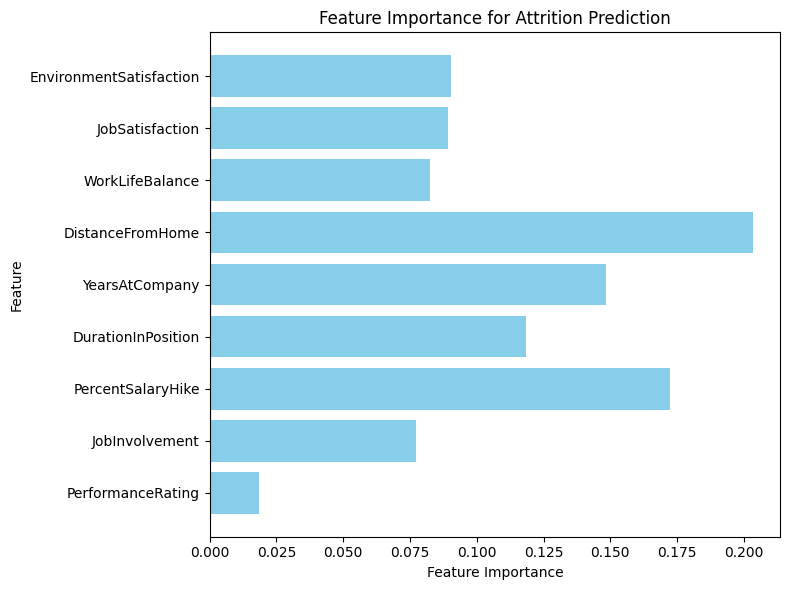

In [456]:
importances = model.feature_importances_

plt.figure(figsize=(8,6))
plt.barh(X.columns, importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance for Attrition Prediction")
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()

DF_ALL EXPLO, CORR, ETC...
---
>

In [457]:
df_all=pd.read_csv('/Users/kalou/Documents/GitHub/rh-analysis/archive/df_all.csv')

In [458]:
df_all.head(6)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,JobLevel,JobRole,...,YearsSinceLastPromotion,YearsWithCurrManager,TotalWorkingHours,AverageHoursPerDay,NumberOfDaysAbsent,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Healthcare Representative,...,0,0,102530,410.0,17,3,3,3.0,4.0,2.0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,2,1,Research Scientist,...,1,4,109189,437.0,13,2,4,3.0,2.0,4.0
2,32,No,Travel_Frequently,Research & Development,17,4,Other,3,4,Sales Executive,...,0,3,101714,407.0,7,3,3,2.0,2.0,1.0
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,4,3,Human Resources,...,7,5,101316,405.0,14,2,3,4.0,4.0,3.0
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,5,1,Sales Executive,...,0,4,117578,470.0,4,3,3,4.0,1.0,3.0
5,46,No,Travel_Rarely,Research & Development,8,3,Life Sciences,6,4,Research Director,...,7,7,153412,614.0,12,3,3,3.0,2.0,2.0


HEATMAP
---
>

In [459]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
lenc=LabelEncoder()
enc=OneHotEncoder()
scaler=StandardScaler()

numerical_features = df_all.select_dtypes(include='number')
no_numerical_features = df_all.select_dtypes(exclude='number')

scaled_num=scaler.fit_transform(numerical_features)

no_numerical_features['BusinessTravel']=lenc.fit_transform(no_numerical_features['BusinessTravel'])
no_numerical_features['Department']=lenc.fit_transform(no_numerical_features['Department'])
no_numerical_features['EducationField']=lenc.fit_transform(no_numerical_features['EducationField'])
no_numerical_features['JobRole']=lenc.fit_transform(no_numerical_features['JobRole'])
no_numerical_features['MaritalStatus']=lenc.fit_transform(no_numerical_features['MaritalStatus'])
no_numerical_features['Attrition']=lenc.fit_transform(no_numerical_features['Attrition'])

df_scaled=pd.DataFrame(scaled_num, columns=numerical_features.columns)

final=pd.concat([no_numerical_features,df_scaled], axis=1)

final_corr=final.corr()


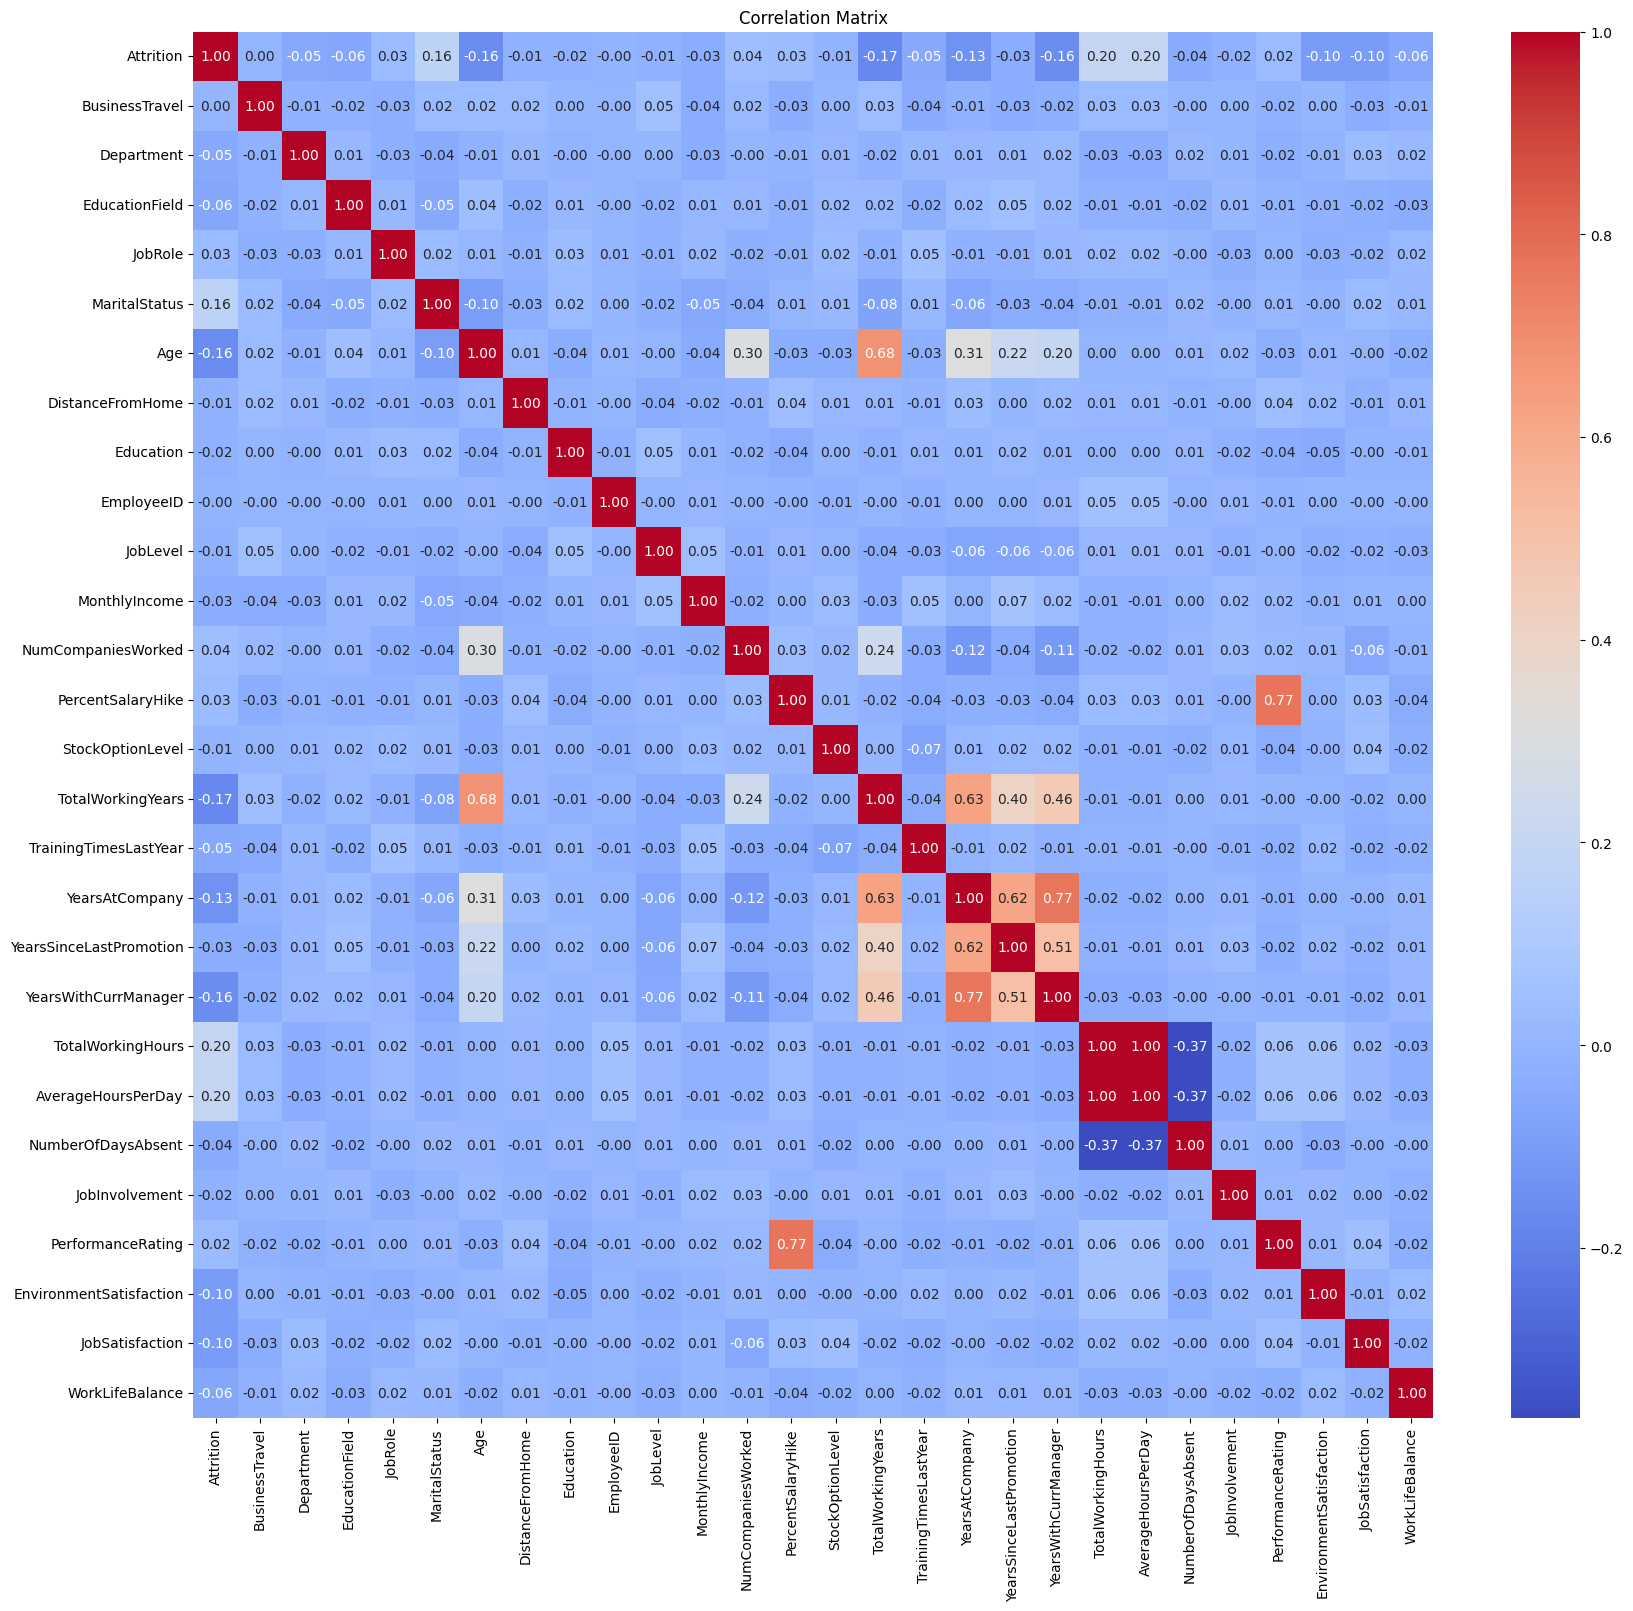

In [460]:
plt.figure(figsize=(20, 18))
sns.heatmap(final_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

EXPLO DISTANCE FROM HOME
---
>

Text(0.5, 0, 'Business Travel')

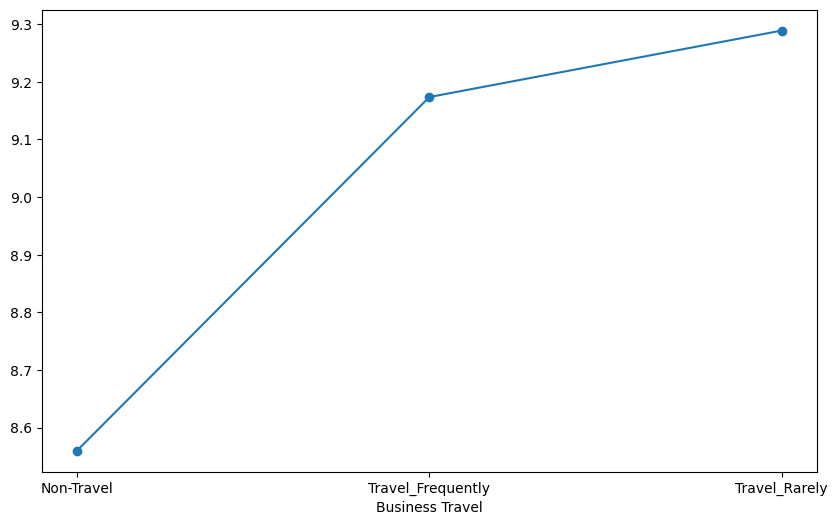

In [461]:
mean_distance = df_all.groupby('BusinessTravel')['DistanceFromHome'].mean()
mean_distance = mean_distance.reset_index()
plt.figure(figsize=(10, 6))
plt.plot(mean_distance['BusinessTravel'], mean_distance['DistanceFromHome'], marker='o')
plt.xlabel('Business Travel')

In [462]:
df_all.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeID', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'TotalWorkingHours', 'AverageHoursPerDay',
       'NumberOfDaysAbsent', 'JobInvolvement', 'PerformanceRating',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance'],
      dtype='object')